In [1]:
import numpy as np
import pandas as pd

#load csv file
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [2]:
df.shape

(1599, 12)

In [3]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1439, 12)
Unseen Data For Predictions: (160, 12)


In [4]:
!pip install pycaret

     |████████████████████████████████| 288 kB 5.3 MB/s 
     |████████████████████████████████| 1.7 MB 42.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 113 kB 16.3 MB/s 
     |████████████████████████████████| 56 kB 4.6 MB/s 
     |████████████████████████████████| 15.5 MB 51.3 MB/s 
     |████████████████████████████████| 2.0 MB 19.5 MB/s 
     |████████████████████████████████| 261 kB 41.9 MB/s 
     |████████████████████████████████| 86 kB 5.4 MB/s 
     |████████████████████████████████| 1.3 MB 37.6 MB/s 
     |████████████████████████████████| 167 kB 46.0 MB/s 
     |████████████████████████████████| 6.8 MB 53.3 MB/s 
     |████████████████████████████████| 10.1 MB 41.2 MB/s 
     |████████████████████████████████| 596 kB 61.1 MB/s 
     |████████████████████████████████| 675 kB 49.4 MB/s 
     |████████████████

In [5]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'alcohol', session_id=123) 

,Description,Value
0,session_id,123
1,Target,alcohol
2,Original Data,"(1439, 12)"
3,Missing Values,False
4,Numeric Features,10
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1007, 16)"


In [6]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.3599,0.2786,0.5236,0.7496,0.0449,0.0342,0.111
rf,Random Forest Regressor,0.3881,0.3085,0.5523,0.7227,0.0471,0.0368,0.985
gbr,Gradient Boosting Regressor,0.4023,0.3071,0.5504,0.7226,0.0471,0.0383,0.168
et,Extra Trees Regressor,0.3697,0.3120,0.5563,0.7210,0.0473,0.0350,0.762
lr,Linear Regression,0.4652,0.3677,0.6036,0.6665,0.0523,0.0445,0.530
lar,Least Angle Regression,0.4762,0.3952,0.6235,0.6463,0.0541,0.0457,0.033
ada,AdaBoost Regressor,0.5639,0.4922,0.7005,0.5600,0.0604,0.0545,0.135
dt,Decision Tree Regressor,0.4804,0.5606,0.7441,0.4928,0.0637,0.0455,0.047
br,Bayesian Ridge,0.6640,0.7347,0.8545,0.3542,0.0725,0.0628,0.029
ridge,Ridge Regression,0.6643,0.7359,0.8552,0.3533,0.0726,0.0628,0.026


In [7]:
ada = create_model('ada')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.6510,0.5960,0.7720,0.5088,0.0663,0.0628
1,0.5214,0.4017,0.6338,0.6485,0.0561,0.0514
2,0.5486,0.4703,0.6858,0.6546,0.0589,0.0527
3,0.5753,0.5328,0.7300,0.3914,0.0632,0.0559
4,0.5796,0.4707,0.6861,0.5621,0.0602,0.0570
5,0.5223,0.5414,0.7358,0.6601,0.0604,0.0485
6,0.5606,0.4961,0.7044,0.5450,0.0614,0.0548
7,0.5701,0.4505,0.6712,0.5596,0.0583,0.0553
8,0.5166,0.4335,0.6584,0.5588,0.0572,0.0498
9,0.5940,0.5292,0.7274,0.5114,0.0623,0.0565


In [8]:
print(ada)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=123)


In [9]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.3640,0.2605,0.5104,0.7853,0.0439,0.0349
1,0.3211,0.1993,0.4465,0.8256,0.0400,0.0316
2,0.2953,0.1860,0.4312,0.8634,0.0367,0.0280
3,0.4116,0.3764,0.6136,0.5700,0.0528,0.0394
4,0.3679,0.2712,0.5207,0.7478,0.0451,0.0355
5,0.3610,0.4037,0.6353,0.7466,0.0512,0.0327
6,0.3503,0.2486,0.4986,0.7720,0.0433,0.0336
7,0.3241,0.2076,0.4556,0.7971,0.0389,0.0309
8,0.3724,0.2852,0.5340,0.7097,0.0465,0.0356
9,0.4315,0.3478,0.5897,0.6788,0.0503,0.0402


In [10]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4942,0.6445,0.8028,0.4688,0.0681,0.0469
1,0.5044,0.6210,0.7881,0.4566,0.0684,0.0481
2,0.4050,0.4933,0.7024,0.6377,0.0582,0.0374
3,0.6010,0.8510,0.9225,0.0280,0.0786,0.0571
4,0.4957,0.4826,0.6947,0.5511,0.0597,0.0472
5,0.4556,0.5560,0.7457,0.6510,0.0637,0.0424
6,0.4965,0.4782,0.6915,0.5615,0.0603,0.0476
7,0.4673,0.4726,0.6875,0.5380,0.0584,0.0445
8,0.3770,0.3697,0.6080,0.6237,0.0527,0.0365
9,0.5068,0.6372,0.7982,0.4116,0.0686,0.0475


In [11]:
tuned_ada = tune_model(ada)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.6094,0.5356,0.7319,0.5585,0.0631,0.0589
1,0.5224,0.4110,0.6411,0.6404,0.0568,0.0516
2,0.5357,0.4436,0.6660,0.6742,0.0570,0.0512
3,0.5493,0.4777,0.6911,0.4544,0.0597,0.0532
4,0.5866,0.4920,0.7014,0.5424,0.0614,0.0575
5,0.5523,0.5706,0.7554,0.6418,0.0623,0.0515
6,0.5610,0.4771,0.6907,0.5625,0.0603,0.0548
7,0.5298,0.4080,0.6388,0.6012,0.0552,0.0512
8,0.5429,0.4453,0.6673,0.5467,0.0582,0.0526
9,0.5866,0.5260,0.7253,0.5143,0.0620,0.0556


In [12]:
import numpy as np
lgbm_params = {'num_leaves': np.arange(10,200,10),
                        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                        'learning_rate': np.arange(0.1,1,0.1)
                        }
tuned_lightgbm = tune_model(lightgbm, custom_grid = lgbm_params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.3577,0.2502,0.5002,0.7938,0.0429,0.0343
1,0.3148,0.1969,0.4437,0.8278,0.0398,0.0310
2,0.3100,0.1986,0.4457,0.8541,0.0379,0.0294
3,0.4221,0.3767,0.6138,0.5697,0.0528,0.0405
4,0.3755,0.2608,0.5107,0.7574,0.0443,0.0363
5,0.3760,0.4115,0.6415,0.7417,0.0518,0.0341
6,0.3491,0.2439,0.4939,0.7763,0.0427,0.0333
7,0.3273,0.2088,0.4569,0.7959,0.0388,0.0311
8,0.3502,0.2634,0.5132,0.7319,0.0447,0.0334
9,0.4213,0.3509,0.5924,0.6760,0.0505,0.0393


In [13]:
print(tuned_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [14]:
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5249,0.5137,0.7167,0.5766,0.0616,0.0503
1,0.4391,0.3564,0.5970,0.6882,0.0519,0.0421
2,0.4724,0.4325,0.6576,0.6824,0.0547,0.0440
3,0.5446,0.6192,0.7869,0.2928,0.0674,0.0514
4,0.5363,0.4780,0.6914,0.5553,0.0601,0.0517
5,0.5241,0.6355,0.7972,0.6011,0.0654,0.0479
6,0.5203,0.5168,0.7189,0.5261,0.0621,0.0501
7,0.5307,0.4938,0.7027,0.5173,0.0602,0.0501
8,0.5090,0.4700,0.6856,0.5216,0.0604,0.0489
9,0.5640,0.6509,0.8068,0.3989,0.0694,0.0526


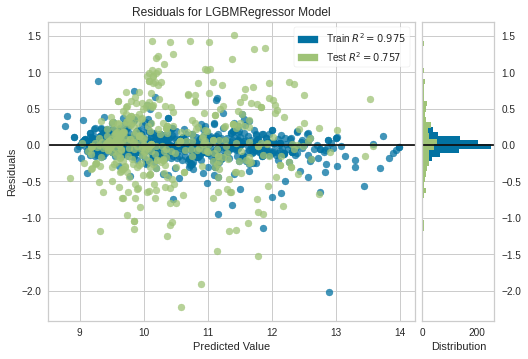

In [15]:
plot_model(tuned_lightgbm)

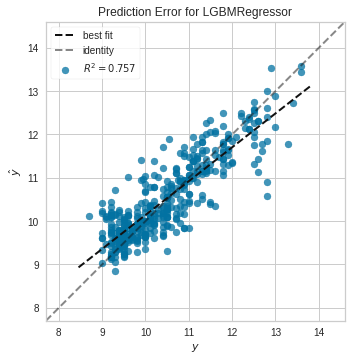

In [16]:
plot_model(tuned_lightgbm, plot = 'error')

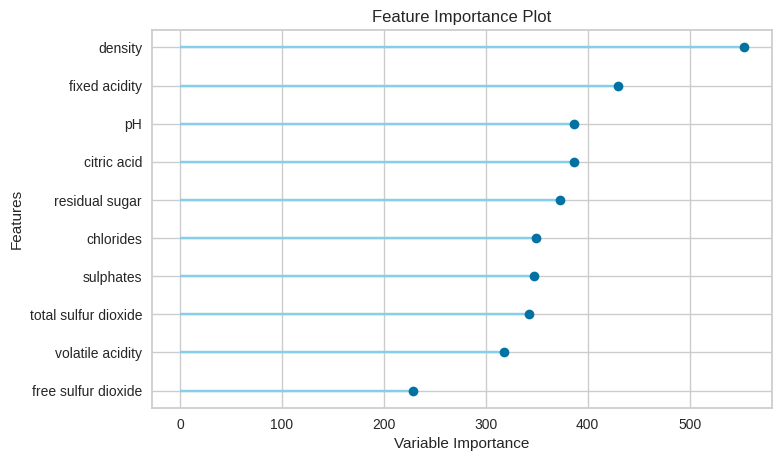

In [17]:
plot_model(tuned_lightgbm, plot='feature')

In [18]:
predict_model(tuned_ada);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,AdaBoost Regressor,0.5509,0.4459,0.6678,0.5862,0.058,0.0533


In [19]:
predict_model(tuned_dt);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,0.5217,0.5154,0.7179,0.5218,0.0616,0.0495


In [20]:
predict_model(tuned_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.3676,0.2615,0.5114,0.7574,0.0443,0.0353


In [21]:
final_ada = finalize_model(tuned_ada)
print(final_ada)

AdaBoostRegressor(base_estimator=None, learning_rate=0.4, loss='exponential',
                  n_estimators=80, random_state=123)


In [22]:
final_dt = finalize_model(tuned_dt)
print(final_dt)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=6,
                      max_features=1.0, max_leaf_nodes=None,
                      min_impurity_decrease=0.002, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')


In [23]:
final_lightgbm = finalize_model(tuned_lightgbm)
print(final_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [24]:
predict_model(final_ada)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,AdaBoost Regressor,0.5345,0.3965,0.6297,0.6321,0.0549,0.0519


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,alcohol,Label
0,8.1,0.66,0.70,2.2,0.098,25.0,129.0,0.99720,3.08,0.53,0.0,0.0,1.0,0.0,0.0,0.0,9.0,10.013415
1,8.3,0.28,0.48,2.1,0.093,6.0,12.0,0.99408,3.26,0.62,0.0,0.0,0.0,0.0,1.0,0.0,12.4,11.807012
2,12.5,0.60,0.49,4.3,0.100,5.0,14.0,1.00100,3.25,0.74,0.0,0.0,0.0,1.0,0.0,0.0,11.9,11.063122
3,7.9,0.34,0.42,2.0,0.086,8.0,19.0,0.99546,3.35,0.60,0.0,0.0,0.0,1.0,0.0,0.0,11.4,10.732683
4,5.9,0.61,0.08,2.1,0.071,16.0,24.0,0.99376,3.56,0.77,0.0,0.0,0.0,1.0,0.0,0.0,11.1,12.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,8.3,0.28,0.48,2.1,0.093,6.0,12.0,0.99408,3.26,0.62,0.0,0.0,0.0,0.0,1.0,0.0,12.4,11.807012
428,9.0,0.80,0.12,2.4,0.083,8.0,28.0,0.99836,3.33,0.65,0.0,0.0,0.0,1.0,0.0,0.0,10.4,10.140185
429,9.5,0.59,0.44,2.3,0.071,21.0,68.0,0.99920,3.46,0.63,0.0,0.0,1.0,0.0,0.0,0.0,9.5,9.876847
430,6.7,0.54,0.13,2.0,0.076,15.0,36.0,0.99730,3.61,0.64,0.0,0.0,1.0,0.0,0.0,0.0,9.8,10.118209


In [25]:
predict_model(final_dt)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,0.4096,0.3485,0.5903,0.6767,0.051,0.039


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,alcohol,Label
0,8.1,0.66,0.70,2.2,0.098,25.0,129.0,0.99720,3.08,0.53,0.0,0.0,1.0,0.0,0.0,0.0,9.0,9.50
1,8.3,0.28,0.48,2.1,0.093,6.0,12.0,0.99408,3.26,0.62,0.0,0.0,0.0,0.0,1.0,0.0,12.4,11.75
2,12.5,0.60,0.49,4.3,0.100,5.0,14.0,1.00100,3.25,0.74,0.0,0.0,0.0,1.0,0.0,0.0,11.9,11.80
3,7.9,0.34,0.42,2.0,0.086,8.0,19.0,0.99546,3.35,0.60,0.0,0.0,0.0,1.0,0.0,0.0,11.4,11.00
4,5.9,0.61,0.08,2.1,0.071,16.0,24.0,0.99376,3.56,0.77,0.0,0.0,0.0,1.0,0.0,0.0,11.1,12.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,8.3,0.28,0.48,2.1,0.093,6.0,12.0,0.99408,3.26,0.62,0.0,0.0,0.0,0.0,1.0,0.0,12.4,11.75
428,9.0,0.80,0.12,2.4,0.083,8.0,28.0,0.99836,3.33,0.65,0.0,0.0,0.0,1.0,0.0,0.0,10.4,10.10
429,9.5,0.59,0.44,2.3,0.071,21.0,68.0,0.99920,3.46,0.63,0.0,0.0,1.0,0.0,0.0,0.0,9.5,9.50
430,6.7,0.54,0.13,2.0,0.076,15.0,36.0,0.99730,3.61,0.64,0.0,0.0,1.0,0.0,0.0,0.0,9.8,9.50


In [26]:
predict_model(final_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.0877,0.0158,0.1256,0.9854,0.0107,0.0083


In [27]:
unseen_predictions1 = predict_model(final_ada, data=data_unseen)
unseen_predictions1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label
0,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,9.838731
1,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,10.658333
2,7.8,0.610,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1,5,9.899804
3,8.1,0.560,0.28,1.7,0.368,16.0,56.0,0.9968,3.11,1.28,9.3,5,9.854938
4,8.3,0.655,0.12,2.3,0.083,15.0,113.0,0.9966,3.17,0.66,9.8,5,10.165915


In [28]:
from pycaret.utils import check_metric
from sklearn.metrics import accuracy_score
print(check_metric(unseen_predictions1.alcohol, unseen_predictions1.Label, 'R2'))

# print(accuracy_score(unseen_predictions1.quality,unseen_predictions1.Label.astype(int)))

0.6384


In [29]:
unseen_predictions2 = predict_model(final_dt, data=data_unseen)
unseen_predictions2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label
0,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,9.5
1,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,10.6
2,7.8,0.610,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1,5,9.5
3,8.1,0.560,0.28,1.7,0.368,16.0,56.0,0.9968,3.11,1.28,9.3,5,9.5
4,8.3,0.655,0.12,2.3,0.083,15.0,113.0,0.9966,3.17,0.66,9.8,5,9.5


In [30]:
print(check_metric(unseen_predictions2.alcohol, unseen_predictions2.Label, 'R2'))

# print(accuracy_score(unseen_predictions2.quality,unseen_predictions2.Label.astype(int)))

0.6157


In [31]:
unseen_predictions3 = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions3.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label
0,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,9.418974
1,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,10.035099
2,7.8,0.610,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1,5,9.321288
3,8.1,0.560,0.28,1.7,0.368,16.0,56.0,0.9968,3.11,1.28,9.3,5,9.304555
4,8.3,0.655,0.12,2.3,0.083,15.0,113.0,0.9966,3.17,0.66,9.8,5,9.572186


In [32]:
print(check_metric(unseen_predictions3.alcohol, unseen_predictions3.Label, 'R2'))

# print(accuracy_score(unseen_predictions3.quality,unseen_predictions3.Label.astype(int)))

0.8456


In [33]:
save_model(final_lightgbm,'Final LightGBM Model 25Nov2020')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='alcohol',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                  LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=60,
                                min_child_samples=20, min_child_weight=0.001,
                  

In [34]:
saved_final_lightgbm = load_model('Final LightGBM Model 25Nov2020')

Transformation Pipeline and Model Successfully Loaded


In [35]:
new_prediction = predict_model(saved_final_lightgbm, data=data_unseen)

In [36]:
new_prediction.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label
0,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,9.418974
1,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,10.035099
2,7.8,0.610,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1,5,9.321288
3,8.1,0.560,0.28,1.7,0.368,16.0,56.0,0.9968,3.11,1.28,9.3,5,9.304555
4,8.3,0.655,0.12,2.3,0.083,15.0,113.0,0.9966,3.17,0.66,9.8,5,9.572186


In [37]:
from pycaret.utils import check_metric
check_metric(new_prediction.alcohol, new_prediction.Label, 'R2')

0.8456